In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from matplotlib.ticker import StrMethodFormatter

In [2]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting['time'] = pd.to_datetime(riskforecasting['time'])
riskforecasting

,site,time,riskLevelLabel
0,ukc1101-06000,2020-05-14,0.0
1,ukc1101-06000,2020-05-15,0.0
2,ukc1101-06000,2020-05-16,0.0
3,ukc1101-06000,2020-05-17,0.0
4,ukc1101-06000,2020-05-18,0.0
...,...,...,...
187110,ukk4307-33900,2022-09-26,0.0
187111,ukk4307-33900,2022-09-27,0.0
187112,ukk4307-33900,2022-09-28,0.0
187113,ukk4307-33900,2022-09-29,0.0


In [ ]:
optics = pd.read_csv("~data/optics.csv")
optics

In [ ]:
transp = pd.read_csv("~data/transp.csv")
transp

In [ ]:
plankton = pd.read_csv("~data/plankton.csv")
plankton

In [ ]:
15*15*(2*365+366)*430

In [ ]:
optics['time'] = pd.to_datetime(optics['time'])
transp['time'] = pd.to_datetime(transp['time'])
plankton['time'] = pd.to_datetime(plankton['time'])

In [ ]:
feature = pd.merge(optics, transp, on=['time', 'lat', 'lon', 'site'], how='outer')
feature = pd.merge(feature, plankton, on=['time', 'lat', 'lon', 'site'], how='outer')

In [ ]:
feature = feature[['time', 'site', 'lat', 'lon', 'BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']].reset_index(drop=True)
feature = feature.sort_values(by=['time', 'site', 'lat', 'lon'])
feature

In [ ]:
len(feature['time'].unique())

In [ ]:
len(feature['site'].unique())

In [ ]:
#feature.to_csv('~data/feature_data(s3).csv', index = False)

In [ ]:
for col in ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']:
    pct_missing = feature[col].isna().mean() * 100
    print(f'{col}: {pct_missing}%')

In [3]:
feature = pd.read_csv('~data/feature_data(s3).csv')
feature['time'] = pd.to_datetime(feature['time'])

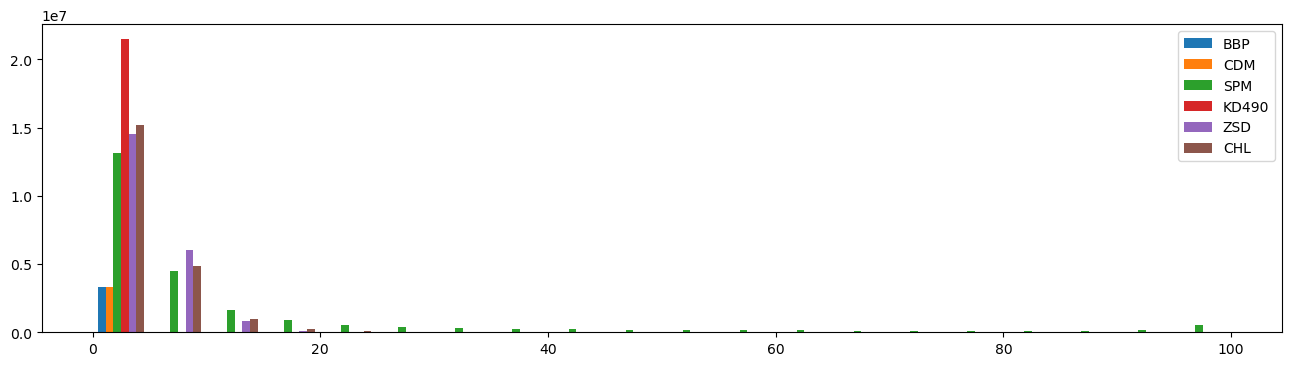

In [6]:
plt.figure(figsize=(16,4))
plt.hist(feature[['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']], 20)
plt.legend(['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'])
plt.show()

## Risk Levels vs. Features

In [4]:
df = pd.merge(riskforecasting, feature, on=['site','time']).dropna()
df

,site,time,riskLevelLabel,lat,lon,BBP,CDM,SPM,KD490,ZSD,CHL
209,ukc1101-06000,2020-05-14,0.0,54.723957,-1.109374,0.014399,0.648437,3.355324,0.622644,1.395820,21.466349
4032,ukc1101-06000,2020-05-31,0.0,54.723957,-1.130207,0.003205,0.562065,0.886917,0.269026,2.530257,5.828330
4033,ukc1101-06000,2020-05-31,0.0,54.723957,-1.119790,0.003205,0.562065,0.835456,0.253835,2.700338,5.319188
4045,ukc1101-06000,2020-05-31,0.0,54.734375,-1.151040,0.003436,0.521394,1.059769,0.299828,2.265095,6.917824
4046,ukc1101-06000,2020-05-31,0.0,54.734375,-1.140624,0.003436,0.521394,1.018437,0.289470,2.343145,6.541950
...,...,...,...,...,...,...,...,...,...,...,...
42098611,ukk4307-33900,2022-09-23,0.0,51.119793,-4.296874,0.015036,0.143632,2.998494,0.192768,3.662488,3.410562
42098612,ukk4307-33900,2022-09-23,0.0,51.119793,-4.286457,0.014988,0.155660,3.036930,0.201452,3.488648,3.666475
42098613,ukk4307-33900,2022-09-23,0.0,51.119793,-4.276041,0.014899,0.175880,3.141879,0.213738,3.251813,4.031521
42098614,ukk4307-33900,2022-09-23,0.0,51.119793,-4.265624,0.013931,0.250478,3.608527,0.272969,2.522157,5.985078


### Hist of each risk level in BBP, CDM, SPM, KD490, ZSD, and CHL

Divide the values into intervals of 10s and group all values above 100 become a single intervel.

In [8]:
df_increased = df[df['riskLevelLabel'] == 1].drop('riskLevelLabel',axis=1)
df_normal = df[df['riskLevelLabel'] == 0].drop('riskLevelLabel',axis=1)

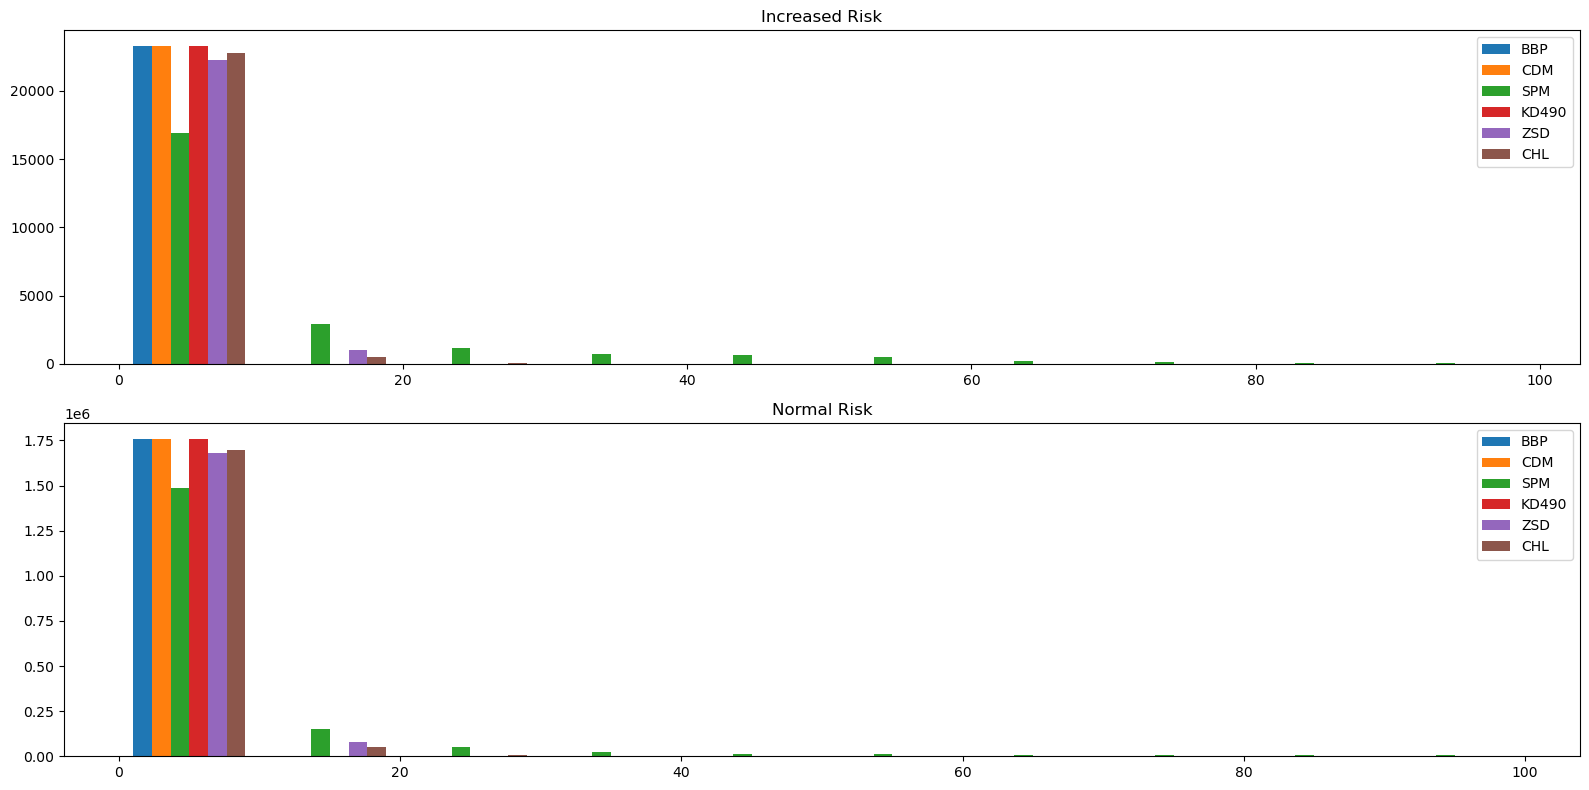

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

axes[0].hist(df_increased[['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']], bins=10, label=['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'])
axes[0].legend()
axes[0].set_title('Increased Risk')

axes[1].hist(df_normal[['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']], bins=10, label=['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'])
axes[1].legend()
axes[1].set_title('Normal Risk')

plt.tight_layout()
plt.show()

In [10]:
# Pearson Correlation
df.corr(method='pearson')

/var/folders/r5/x64ktbgx58365__7s6m8nvqh0000gn/T/ipykernel_27390/1549877867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,riskLevelLabel,lat,lon,BBP,CDM,SPM,KD490,ZSD,CHL
riskLevelLabel,1.000000,0.054219,0.013861,0.026170,-0.003040,0.035824,0.010884,-0.017200,0.006296
lat,0.054219,1.000000,0.338111,0.151058,0.241844,0.128727,0.300840,-0.309316,0.256162
lon,0.013861,0.338111,1.000000,0.628451,0.372720,0.384185,0.384906,-0.502086,0.307695
BBP,0.026170,0.151058,0.628451,1.000000,0.523362,0.726238,0.454274,-0.512739,0.375543
CDM,-0.003040,0.241844,0.372720,0.523362,1.000000,0.302614,0.714051,-0.590401,0.670567
SPM,0.035824,0.128727,0.384185,0.726238,0.302614,1.000000,0.281846,-0.317444,0.227274
KD490,0.010884,0.300840,0.384906,0.454274,0.714051,0.281846,1.000000,-0.762811,0.978049
ZSD,-0.017200,-0.309316,-0.502086,-0.512739,-0.590401,-0.317444,-0.762811,1.000000,-0.638522
CHL,0.006296,0.256162,0.307695,0.375543,0.670567,0.227274,0.978049,-0.638522,1.000000


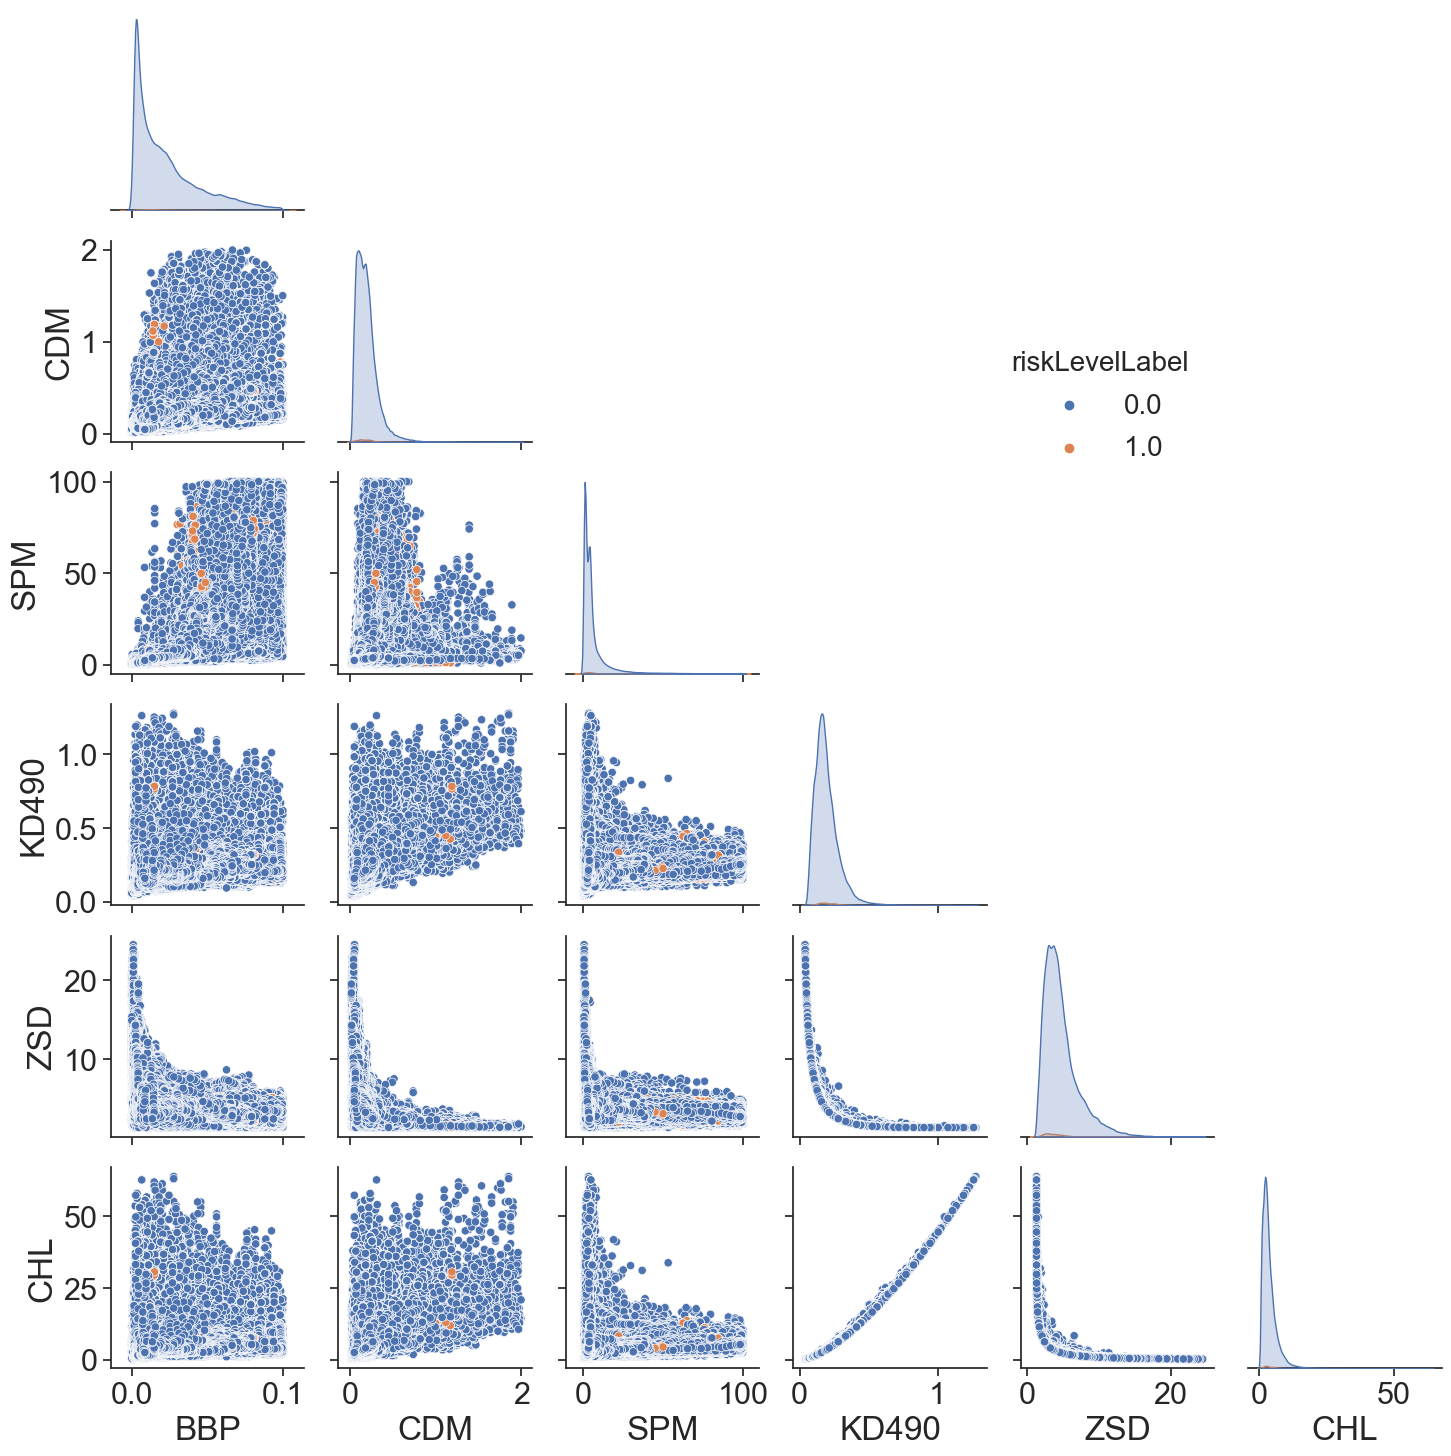

In [5]:
df = df[['riskLevelLabel','BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']]

sns.set(font_scale=2, style='ticks')
g = sns.pairplot(df, hue='riskLevelLabel', corner=True)

g._legend.set_bbox_to_anchor((0.7,0.7))
for text in g._legend.texts:
    text.set_fontsize(20)
g._legend.get_title().set_fontsize(20)

plt.show()

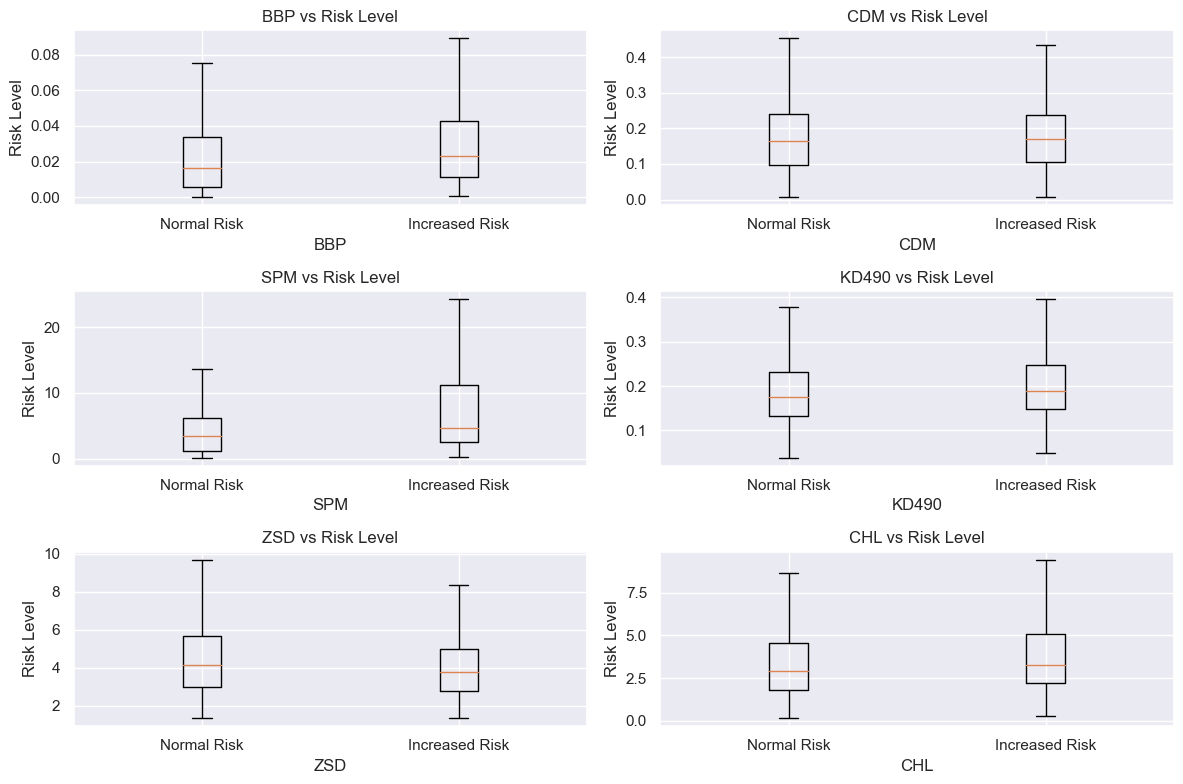

In [7]:
labels = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
sns.set(font_scale=1)

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df.loc[df["riskLevelLabel"] == 0, labels[i]].dropna(),
                df.loc[df["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

In [8]:
# Pearson Correlation
df.corr(method='pearson')

,riskLevelLabel,BBP,CDM,SPM,KD490,ZSD,CHL
riskLevelLabel,1.000000,0.026170,-0.003040,0.035824,0.010884,-0.017200,0.006296
BBP,0.026170,1.000000,0.523362,0.726238,0.454274,-0.512739,0.375543
CDM,-0.003040,0.523362,1.000000,0.302614,0.714051,-0.590401,0.670567
SPM,0.035824,0.726238,0.302614,1.000000,0.281846,-0.317444,0.227274
KD490,0.010884,0.454274,0.714051,0.281846,1.000000,-0.762811,0.978049
ZSD,-0.017200,-0.512739,-0.590401,-0.317444,-0.762811,1.000000,-0.638522
CHL,0.006296,0.375543,0.670567,0.227274,0.978049,-0.638522,1.000000


In [9]:
# Kendall Correlation
df.corr(method='kendall')

/Users/yuhanwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,riskLevelLabel,BBP,CDM,SPM,KD490,ZSD,CHL
riskLevelLabel,1.000000,0.029684,0.002351,0.038305,0.017750,-0.017977,0.017698
BBP,0.029684,1.000000,0.478306,0.846503,0.456865,-0.459915,0.456145
CDM,0.002351,0.478306,1.000000,0.462982,0.593956,-0.595785,0.593518
SPM,0.038305,0.846503,0.462982,1.000000,0.456221,-0.459168,0.455522
KD490,0.017750,0.456865,0.593956,0.456221,1.000000,-0.995179,0.998861
ZSD,-0.017977,-0.459915,-0.595785,-0.459168,-0.995179,1.000000,-0.994040
CHL,0.017698,0.456145,0.593518,0.455522,0.998861,-0.994040,1.000000


In [10]:
# Spearman Correlation
df.corr(method='spearman')

,riskLevelLabel,BBP,CDM,SPM,KD490,ZSD,CHL
riskLevelLabel,1.000000,0.036355,0.002880,0.046914,0.021739,-0.022017,0.021675
BBP,0.036355,1.000000,0.674425,0.966615,0.631875,-0.636248,0.630849
CDM,0.002880,0.674425,1.000000,0.657869,0.781324,-0.783528,0.780794
SPM,0.046914,0.966615,0.657869,1.000000,0.635173,-0.639314,0.634191
KD490,0.021739,0.631875,0.781324,0.635173,1.000000,-0.999686,0.999980
ZSD,-0.022017,-0.636248,-0.783528,-0.639314,-0.999686,1.000000,-0.999522
CHL,0.021675,0.630849,0.780794,0.634191,0.999980,-0.999522,1.000000
